<a href="https://colab.research.google.com/github/Muhammad-Gunzalas/Artificial_Neural_Network_with-_Tensorflow/blob/main/Train_Health_Insurance_Cross_Sell_Prediction_using_Logistic_Regression_and_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn.metrics as sk

In [ ]:
data=pd.read_csv('/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [ ]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [ ]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
data['Vehicle_Damage'].fillna(data['Vehicle_Damage'].mode()[0],inplace=True)
data['Annual_Premium'].fillna(data['Annual_Premium'].mode()[0],inplace=True)
data['Policy_Sales_Channel'].fillna(data['Policy_Sales_Channel'].mode()[0],inplace=True)
data['Vintage'].fillna(data['Vintage'].mode()[0],inplace=True)
data['Response'].fillna(data['Response'].mode()[0],inplace=True)


In [ ]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
data.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [ ]:
data['Gender']=data['Gender'].map({'Male':0,'Female':1})

In [ ]:
data['Gender'].value_counts()

0    206089
1    175020
Name: Gender, dtype: int64

In [ ]:
data['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [ ]:
data['Vehicle_Age']=data['Vehicle_Age'].map({'1-2 Year':0,'< 1 Year':1,'> 2 Years':2})

In [ ]:
data['Vehicle_Age'].value_counts()

0    200316
1    164786
2     16007
Name: Vehicle_Age, dtype: int64

In [ ]:
data['Vehicle_Damage']=data['Vehicle_Damage'].map({'No':0,'Yes':1})

In [ ]:
data['Vehicle_Damage'].value_counts()

1    192413
0    188696
Name: Vehicle_Damage, dtype: int64

In [ ]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
data.dtypes

id                      int64
Gender                  int64
Age                     int64
Driving_License         int64
Region_Code             int64
Previously_Insured      int64
Vehicle_Age             int64
Vehicle_Damage          int64
Annual_Premium          int64
Policy_Sales_Channel    int64
Vintage                 int64
Response                int64
dtype: object

In [ ]:
#data=data[data['Vehicle_Age']!=1]

In [ ]:
data.shape

(381109, 12)

In [ ]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
data=data.drop(['id'],axis=1)

In [ ]:
data.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
for i in data.columns:
  data[i]=(data[i]-data[i].min())/(data[i].max()-data[i].min())

In [ ]:
data.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0.0,0.369231,1.0,0.538462,0.0,1.0,1.0,0.070366,0.154321,0.716263,1.0
1,0.0,0.861538,1.0,0.057692,0.0,0.0,0.0,0.057496,0.154321,0.598616,0.0
2,0.0,0.415385,1.0,0.538462,0.0,1.0,1.0,0.066347,0.154321,0.058824,1.0
3,0.0,0.015385,1.0,0.211538,1.0,0.5,0.0,0.048348,0.932099,0.667820,0.0
4,1.0,0.138462,1.0,0.788462,1.0,0.5,0.0,0.046259,0.932099,0.100346,0.0


In [ ]:
data.tail(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,0.0,0.830769,1.0,0.500000,1.0,0.0,0.0,0.051234,0.154321,0.269896,0.0
381105,0.0,0.153846,1.0,0.711538,1.0,0.5,0.0,0.069551,0.932099,0.418685,0.0
381106,0.0,0.015385,1.0,0.576923,1.0,0.5,0.0,0.060439,0.981481,0.522491,0.0
381107,1.0,0.738462,1.0,0.269231,0.0,1.0,1.0,0.078110,0.759259,0.221453,0.0
381108,0.0,0.400000,1.0,0.557692,0.0,0.0,0.0,0.072827,0.154321,0.785467,0.0


In [ ]:
data.dtypes

Gender                  float64
Age                     float64
Driving_License         float64
Region_Code             float64
Previously_Insured      float64
Vehicle_Age             float64
Vehicle_Damage          float64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                 float64
Response                float64
dtype: object

In [ ]:
data.shape

(381109, 11)

In [ ]:
data['Response'].value_counts()

0.0    334399
1.0     46710
Name: Response, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=data.drop(['Response'],axis=1)
y=data['Response']

In [ ]:
x.shape , y.shape

((381109, 10), (381109,))

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the minority class
x_resampled, y_resampled = ros.fit_resample(x, y)

# X_resampled: balanced feature matrix
# y_resampled: balanced target vector


In [ ]:
x_resampled.shape

(668798, 10)

In [ ]:
#x_resampled.shape
y_resampled.value_counts()

1.0    334399
0.0    334399
Name: Response, dtype: int64

In [ ]:
x_train , x_test , y_train , y_test =train_test_split(x_resampled,y_resampled,random_state=40,test_size=0.3)

In [ ]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((468158, 10), (200640, 10), (468158,), (200640,))

In [ ]:
x_train =x_train.values
x_test= x_test.values
y_train= y_train.values
y_test= y_test.values

In [ ]:
class LogisticRegression:
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y, learning_rate, num_iterations):
        m = X.shape[0]
        n = X.shape[1]

        self.weights = np.zeros(n)

        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

        for i in range(self.num_iterations):
            # Forward propagation
            z = X @ self.weights
            A = self.sigmoid(z)

            # Compute cost
            cost = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))

            # Backward propagation
            dZ = A - y
            dW = (1/m) * (X.T @ dZ)

            # Update weights
            self.weights -= self.learning_rate * dW

    def predict(self, X):
        z = X @ self.weights
        A = self.sigmoid(z)
        predictions = np.round(A)
        return predictions


In [ ]:

# Instantiate logistic regression model
lr = LogisticRegression()
learning_rate=0.01
num_iterations=100

# Train the model
lr.fit(x_train, y_train,learning_rate,num_iterations)

# Make predictions
predictions = lr.predict(x_test)



In [ ]:

predictions=np.round(predictions)
accuracy=sk.accuracy_score(y_test,predictions)
precision=sk.precision_score(y_test,predictions, zero_division=1)
recall=sk.recall_score(y_test,predictions, zero_division=1)
f1_score=sk.f1_score(y_test,predictions, zero_division=1)
print("Accuracy :",accuracy)
print("Precision :",precision)
print("Recall :",recall)
print("F1_score :",f1_score)



Accuracy : 0.7789872408293461
Precision : 0.699740207833733
Recall : 0.977331632042745
F1_score : 0.8155622473256028


In [ ]:
import tensorflow as tf

In [ ]:
import keras

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import InputLayer,Dense

In [ ]:
x_train.shape[1]

10

In [ ]:
input_neurons=x_train.shape[1]

In [ ]:
output_nerons=1

In [ ]:
model=Sequential()

In [ ]:
model.add(InputLayer(input_shape=(input_neurons)))

In [ ]:
model.add(Dense(units=50,activation='relu'))

In [ ]:
model.add(Dense(units=50,activation='relu'))

In [ ]:
model.add(Dense(units=20,activation='relu'))

In [ ]:
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                550       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 4,141
Trainable params: 4,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile the model

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [ ]:
#from sklearn.utils import validation
model_history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
14630/14630 [==============================] - 71s 5ms/step - loss: 0.4434 - accuracy: 0.7852 - val_loss: 0.4336 - val_accuracy: 0.7879
Epoch 2/10
14630/14630 [==============================] - 65s 4ms/step - loss: 0.4318 - accuracy: 0.7925 - val_loss: 0.4322 - val_accuracy: 0.7910
Epoch 3/10
14630/14630 [==============================] - 65s 4ms/step - loss: 0.4303 - accuracy: 0.7935 - val_loss: 0.4296 - val_accuracy: 0.7944
Epoch 4/10
14630/14630 [==============================] - 66s 4ms/step - loss: 0.4295 - accuracy: 0.7940 - val_loss: 0.4307 - val_accuracy: 0.7924
Epoch 5/10
14630/14630 [==============================] - 64s 4ms/step - loss: 0.4292 - accuracy: 0.7942 - val_loss: 0.4288 - val_accuracy: 0.7947
Epoch 6/10
14630/14630 [==============================] - 65s 4ms/step - loss: 0.4289 - accuracy: 0.7944 - val_loss: 0.4296 - val_accuracy: 0.7933
Epoch 7/10
14630/14630 [==============================] - 65s 4ms/step - loss: 0.4286 - accuracy: 0.7945 - val_loss: 0

In [ ]:
prediction=model.predict(x_test)
prediction=np.round(prediction)
accuracy=sk.accuracy_score(y_test,prediction)
precision=sk.precision_score(y_test,prediction)
recall=sk.recall_score(y_test,prediction)
f1_score=sk.f1_score(y_test,prediction)
print("Accuracy :",accuracy)
print("Precision :",precision)
print("Recall :",recall)
print("F1_score :",f1_score)



6270/6270 [==============================] - 10s 2ms/step
Accuracy : 0.7947169059011164
Precision : 0.7395941390041494
Recall : 0.9097252681526377
F1_score : 0.8158849929372217


In [ ]:
import matplotlib.pyplot as plt

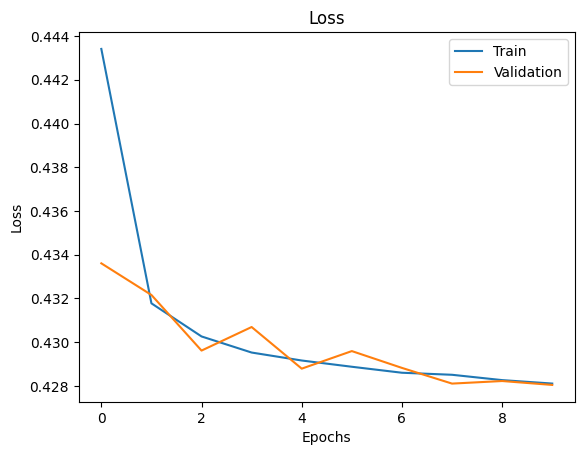

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

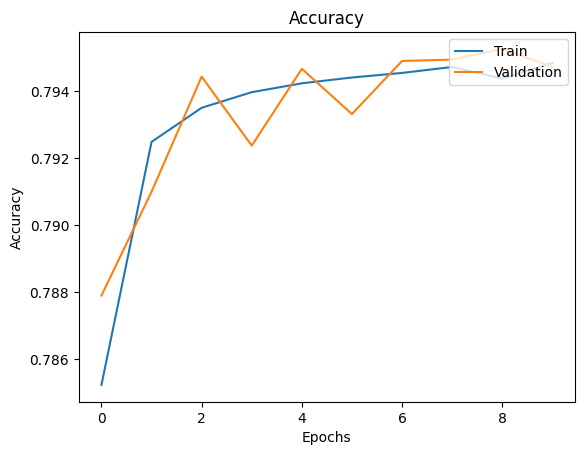

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Train','Validation'],loc='upper right')
plt.show()